In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def x_k(k, n):
    return 1 + k/n

def y_k(x):
    return np.log(x)

class Lagrange():
    def __init__(self, x_array):
        self.l_array = []
        self.N = len(x_array)
        for i in range(self.N):
            self.l_array.append(1)
            for j in range(self.N):
                if i == j:
                    continue
                self.l_array[i] *= x[i] - x[j]
                
    def calculate(self, x_array, y_array, x_result):
        y_result = []
        for k, x_i in enumerate(x_result):
            res = 0
            for i in range(self.N):
                l_i = 1
                for j in range(self.N):
                    if i == j:
                        continue
                    l_i *= x_i - x_array[j] 
                res += y_array[i] * l_i / self.l_array[i]
            y_result.append(res)
        return np.array(y_result)
        

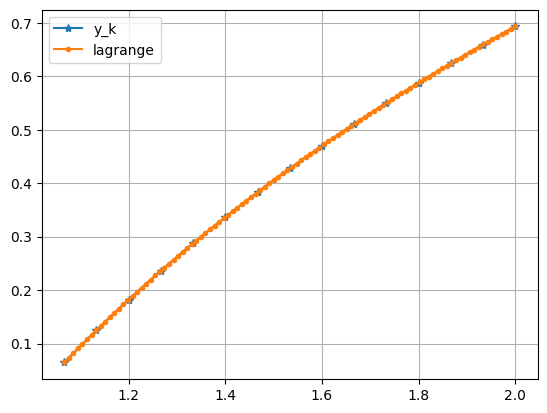

In [21]:
N = 15
k = np.arange(1, N+1, 1)
x = x_k(k, N)
y = y_k(x)

x1 = np.linspace(x[0], x[-1], 100)
L = Lagrange(x)
res = L.calculate(x, y, x1)


plt.plot(x, y, marker="*", label="y_k")
plt.plot(x1, res, marker=".", label="lagrange")
plt.legend()
plt.grid()
plt.show()

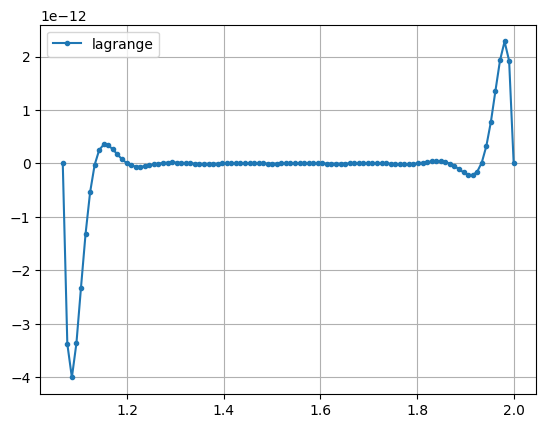

In [22]:
plt.plot(x1, res-y_k(x1), marker=".", label="lagrange")
plt.legend()
plt.grid()
plt.show()